# Breast Cancer Classification

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys as sys
import seaborn as sns
import scipy as cp

In [2]:
#import dataset
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

#dataset = pd.read_csv('C:\\Users\\KIIT\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv')

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
print(dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
dataset['data'].shape

(569, 30)

In [7]:
data = pd.DataFrame(np.c_[dataset['data'],dataset['target']],columns = np.append(dataset['feature_names'],['target']))
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
np.unique(data['target'])

array([0., 1.])

# Data Visualizing

In [9]:
corr_matrix = data.corr()
corr_matrix['target'].sort_values(ascending = False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

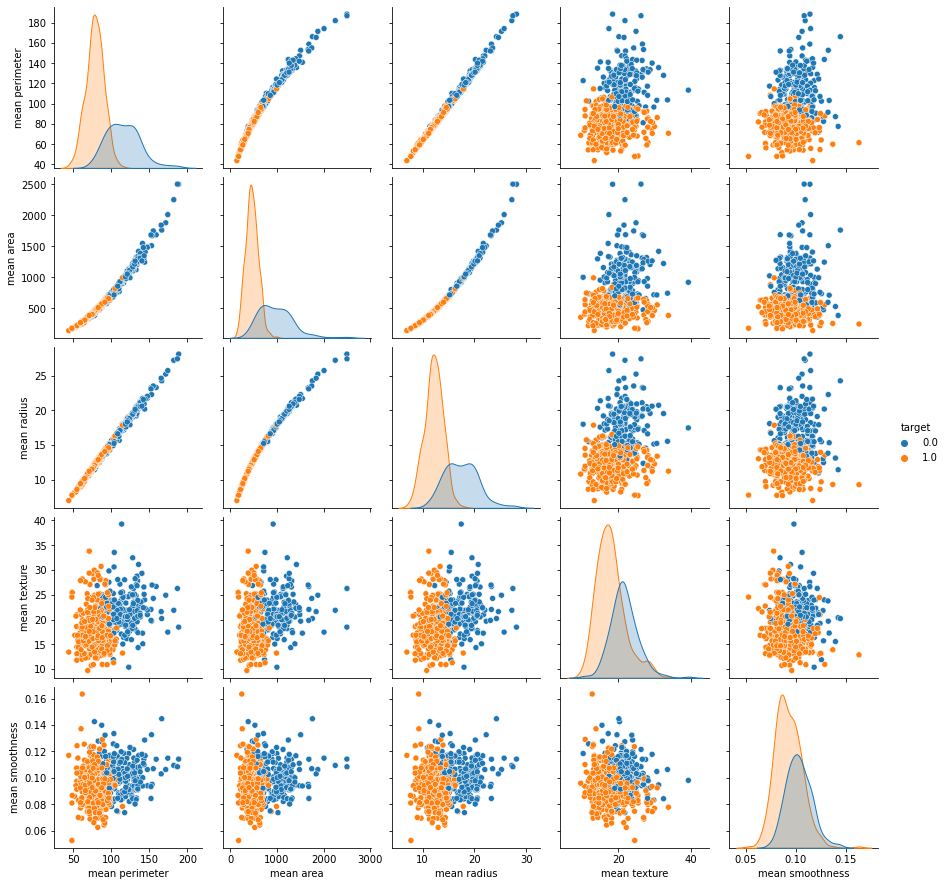

In [10]:
sns.pairplot(data, hue = 'target', vars =['mean perimeter','mean area','mean radius','mean texture','mean smoothness'])

In [11]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [12]:
data['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<AxesSubplot:>

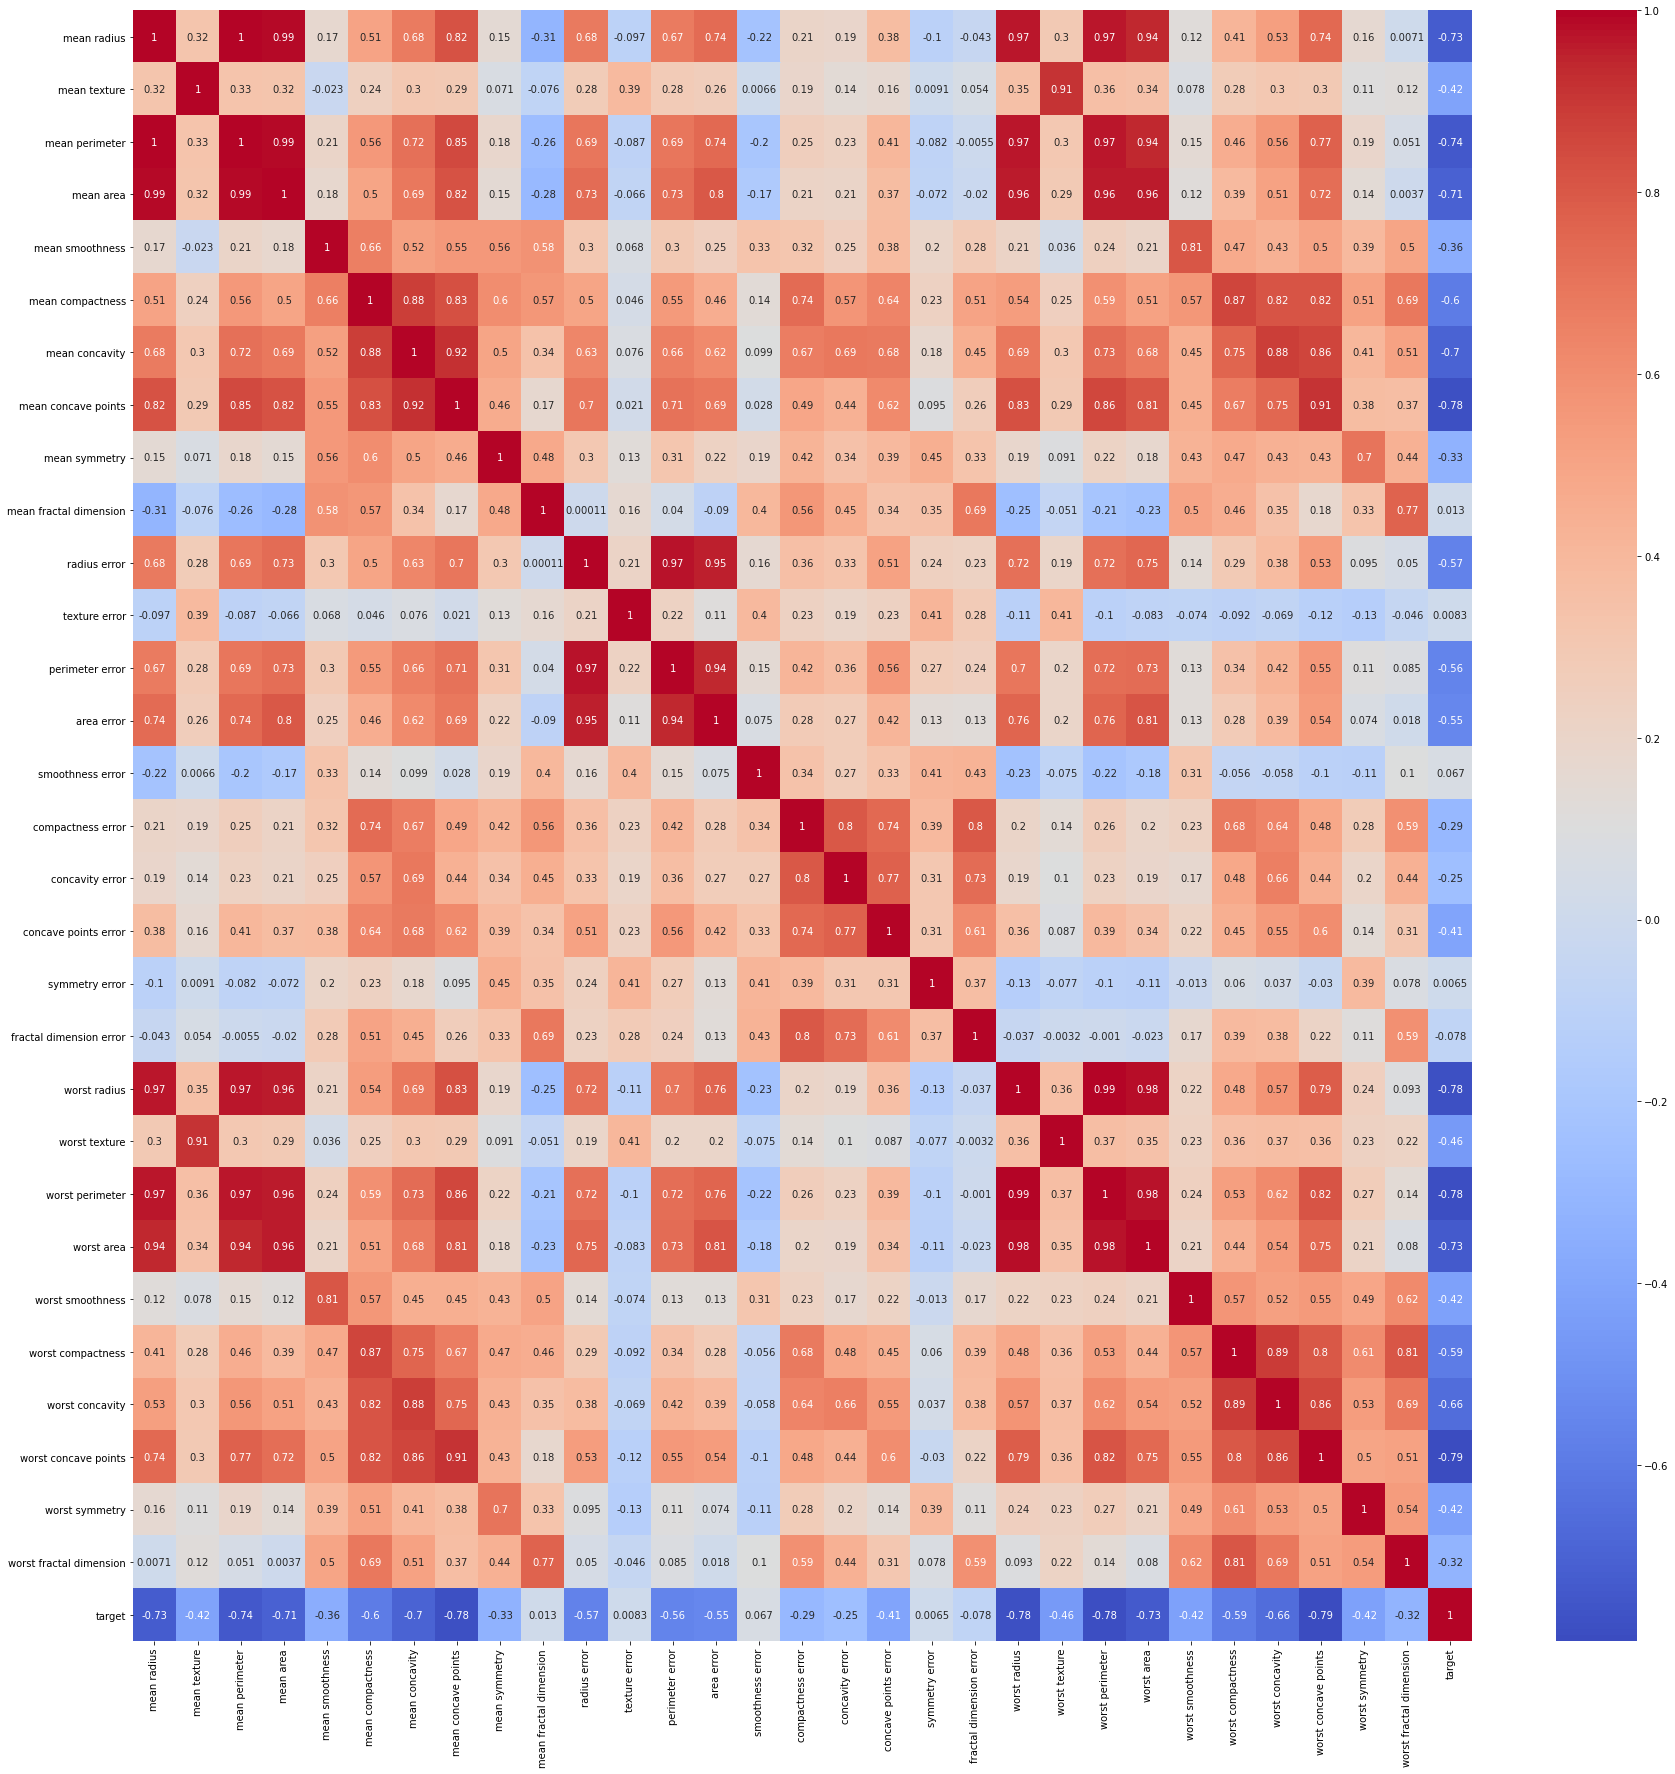

In [13]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
cc=corr[abs(corr['diagnosis']) > 0.59].index
print('- Number of most correlated features = ', len(cc))
print('--------------------------------------------------')
print('- Most correlated features is: \n ',cc)

# Model Building

In [14]:
x = data.drop('target',axis=1)
y = data['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [15]:
#x=x.iloc[:,:].values

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
print(f'Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}')

Rows in train set: 455
Rows in test set: 114


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

In [19]:
n_estimators = range(200,400,50)
max_depth = range(5,9,2)
learning_rate = [0.09,0.2,0.1]
subsample = [0.8,0.75]

hyp_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'subsample' : subsample,
    'learning_rate' : learning_rate
}

In [20]:
random_cv = GridSearchCV(xgb_classifier,
                param_grid = hyp_grid,
                refit=True,
                verbose=5)

In [21]:
x_valid = x_test
y_valid = y_test

In [22]:
random_cv.fit(x_train,y_train)
random_cv.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8, score=0.978, total=   0.5s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8 
[23:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8, score=0.989, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8 
[23:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8, score=0.945, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8 
[23:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8, score=0.989, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8 
[23:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.8, score=0.978, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200, subsample=0.75 
[23:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=5, 

[CV]  learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8, score=0.989, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8 
[23:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8, score=0.934, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8 
[23:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=5, n

[CV]  learning_rate=0.09, max_depth=5, n_estimators=350, subsample=0.75, score=0.989, total=   0.2s
[CV] learning_rate=0.09, max_depth=7, n_estimators=200, subsample=0.8 
[23:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=7, n_estimators=200, subsample=0.8, score=0.978, total=   0.2s
[CV] learning_rate=0.09, max_depth=7, n_estimators=200, subsample=0.8 
[23:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=7, 

[CV]  learning_rate=0.09, max_depth=7, n_estimators=250, subsample=0.75, score=0.989, total=   0.2s
[CV] learning_rate=0.09, max_depth=7, n_estimators=250, subsample=0.75 
[23:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=7, n_estimators=250, subsample=0.75, score=0.934, total=   0.2s
[CV] learning_rate=0.09, max_depth=7, n_estimators=250, subsample=0.75 
[23:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=

[CV]  learning_rate=0.09, max_depth=7, n_estimators=350, subsample=0.8, score=0.967, total=   0.3s
[CV] learning_rate=0.09, max_depth=7, n_estimators=350, subsample=0.75 
[23:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=7, n_estimators=350, subsample=0.75, score=0.967, total=   0.3s
[CV] learning_rate=0.09, max_depth=7, n_estimators=350, subsample=0.75 
[23:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.09, max_depth=7

[CV]  learning_rate=0.2, max_depth=5, n_estimators=250, subsample=0.8, score=0.934, total=   0.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=250, subsample=0.8 .
[23:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=5, n_estimators=250, subsample=0.8, score=1.000, total=   0.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=250, subsample=0.8 .
[23:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=5, n_es

[CV]  learning_rate=0.2, max_depth=5, n_estimators=350, subsample=0.8, score=0.967, total=   0.3s
[CV] learning_rate=0.2, max_depth=5, n_estimators=350, subsample=0.8 .
[23:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=5, n_estimators=350, subsample=0.8, score=0.989, total=   0.3s
[CV] learning_rate=0.2, max_depth=5, n_estimators=350, subsample=0.8 .
[23:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=5, n_es

[CV]  learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.75, score=1.000, total=   0.2s
[CV] learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.75 
[23:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.75, score=0.978, total=   0.2s
[CV] learning_rate=0.2, max_depth=7, n_estimators=250, subsample=0.8 .
[23:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=7, n_

[CV]  learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.75, score=0.978, total=   0.2s
[CV] learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.75 
[23:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.75, score=0.945, total=   0.2s
[CV] learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.75 
[23:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, max_depth=7, n_

[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, score=0.978, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.75 
[23:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.75, score=0.978, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.75 
[23:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=5, n_e

[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8, score=0.934, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8 .
[23:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8, score=0.989, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8 .
[23:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=5, n_es

[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8, score=0.978, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8 .
[23:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8, score=0.989, total=   0.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8 .
[23:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=7, n_es

[CV]  learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.75, score=1.000, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.75 
[23:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=7, n_estimators=250, subsample=0.75, score=0.978, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8 .
[23:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=7, n_

[CV]  learning_rate=0.1, max_depth=7, n_estimators=350, subsample=0.75, score=0.989, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=350, subsample=0.75 
[23:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=7, n_estimators=350, subsample=0.75, score=0.934, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=350, subsample=0.75 
[23:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=7, n_

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.0min finished


{'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}

In [28]:
xgb_regressor = xgb.XGBClassifier(learning_rate=0.09, n_estimators=350, subsample=0.75, max_depth=7)
xgb_regressor.fit(x_train,y_train,early_stopping_rounds=80, eval_set=[(x_valid, y_valid)])

[23:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.62376
[1]	validation_0-logloss:0.56429
[2]	validation_0-logloss:0.51669
[3]	validation_0-logloss:0.47615
[4]	validation_0-logloss:0.43720
[5]	validation_0-logloss:0.40543
[6]	validation_0-logloss:0.37654
[7]	validation_0-logloss:0.35297
[8]	validation_0-logloss:0.33099
[9]	validation_0-logloss:0.30860
[10]	validation_0-logloss:0.29076
[11]	validation_0-logloss:0.27316
[12]	validation_0-logloss:0.25852
[13]	validation_0-logloss:0.24607
[14]	validation_0-logloss:0.23415
[15]	validation_0-logloss:0.22332
[16]	validation_0-logloss:0.21618
[17]	validation_0-logloss:0.20727
[18]	validation_0-logloss:0.19967
[19]	validation_0-logloss:0.19156
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
# Predicting the Test set results
y_pred_xgb = xgb_regressor.predict(x_test)
y_pred_xgb

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score


[[39  3]
 [ 3 69]]


In [26]:
a = accuracy_score(y_test,y_pred_xgb)*100
a

95.6140350877193

In [27]:
#Visualizing the performace of the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#print(classification_report(y_pred, y_test, target_names = ['Malignant (Class 0)','Benign (Class 1)']))
print(classification_report(y_pred_xgb, y_test, 
                            target_names = ['Malignant(Class 0)','Benign (Class 1)']))

                    precision    recall  f1-score   support

Malignant(Class 0)       0.90      0.97      0.94        39
  Benign (Class 1)       0.99      0.95      0.97        75

          accuracy                           0.96       114
         macro avg       0.95      0.96      0.95       114
      weighted avg       0.96      0.96      0.96       114

